## IMPORTANT NOTES BEFORE USING!
* AFTER RUNNING ALL CELLS, BROWSER MUST BE MINIMIZED, THEN MAXIMIZED AGAIN TO GET THE CORRECT SHAPES AND EXTENTS OF FIGURES.
* IF ALL FIRING RATES ARE SET TO 0, THE PLOTS MAY FAIL TO REGISTER CHANGES, REQUIRING THE CELL TO BE RERUN. INITIAL FIRING RATES THUS HAVE A NON-ZERO INPUT AT THE FINAL TIME-STEP TO AVOID THIS ISSUE

### IMPORTS AND SET SEED

In [1]:
import cv2 
import pickle
import ipywidgets as widgets
import scipy.signal as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as mplplt
import bqplot as bq
from bqplot import pyplot as plt

In [2]:
np.random.seed(0)

### CREATE CUSTOM COLOR MAP BASED ON BRUYNS-HAYLETT ARTICLE

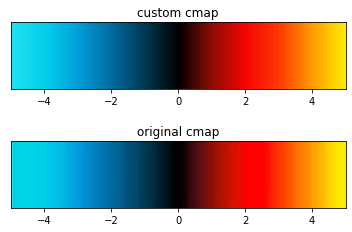

In [3]:
#IMPORT BRUYNS-HAYLETT SCALE AND CONVERT TO RGB
img_bgr = cv2.imread('scale.jpg')
img = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)


# CREATE MATPLOTLIB COLORMAP
norm = matplotlib.colors.Normalize(-5, 5)
num_segments=11

r=[]
g=[]
b=[]

normalize_vals = np.linspace(-5,5,num_segments)
br = np.linspace(0,img.shape[1]-1,num_segments).astype(int)

for i in br:
    r.append(img[3][i][0]/255)
    g.append(img[3][i][1]/255)
    b.append(img[3][i][2]/255)

custom_colors=[]
for i in range(num_segments):
    custom_colors.append([norm(normalize_vals[i]),(r[i],g[i],b[i])])
custom_colors[int(num_segments/2)] = [norm(0),(0.,0.,0.)] #explicitely set center value to black

custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", custom_colors)

# CREATE MATRIX TO IMITATE BRUYNS-HAYLETT SCALE
diverging_line = np.linspace(-5,5,img.shape[1])

diverging_matrix = []
for i in range(img.shape[0]):
    diverging_matrix.append(diverging_line)
    
# CREATE COMPARISON PLOT
fig,(ax1,ax2) = mplplt.subplots(2,1)
ax1.imshow(
    diverging_matrix,
    cmap=custom_cmap,
    vmin = diverging_line[0],
    vmax=diverging_line[-1],
    extent=[diverging_line[0],diverging_line[-1],-1,1]
)
ax2.imshow(
    img,
    extent=[diverging_line[0],diverging_line[-1],-1,1]
)
ax1.set_title('custom cmap')
ax2.set_title('original cmap')
ax1.set_yticks([])
ax2.set_yticks([]);

### MAKE SINGLE-VALUE 2D MATRIX REPRESENTATIONS OF BRUYNS-HAYLETT FIGURES

In [4]:
#SVM = Single value matrix, which is what i called the converted images
def create_SVM(img_name):
    img_bgr = cv2.imread(img_name)
    img_t = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    img_t = img_t[4:-5,2:-5] #cut away "messy" data along edges, done by visual inspection of iCSD inh-blocked

    #blue masks
    color_1 = np.asarray([0,0,28])
    color_2 = np.asarray([255,255,255])
    mask = cv2.inRange(img_t,color_1,color_2)
    red_mask = img_t.copy()
    red_mask[mask != 0] = (img_t[0,0,0],img_t[0,0,1],img_t[0,0,2])
    
    red = []
    for i in range(img_t.shape[0]):
        red.append(((255/255)*red_mask[i,:,0]).astype(int)+((238/255)*red_mask[i,:,1]).astype(int)+(0*red_mask[i,:,2]).astype(int))
    red=np.multiply(red,1)
    
#     fig,(ax1,ax2)=mplplt.subplots(1,2,sharey=True)
#     fig.suptitle('Blues masked')
#     ax1.imshow(red,cmap=custom_cmap,vmax=np.max(red),vmin=-np.max(red),extent=[0,40,1600,100],aspect=.035)
#     ax2.imshow(red_mask,extent=[0,40,1600,100],aspect=.035)
#     ax1.set_title('SV Matrix')
#     ax2.set_title('Original figure');
    
    #red masks
    color_1 = np.asarray([12,0,0])
    color_2 = np.asarray([255,255,255])
    mask = cv2.inRange(img_t,color_1,color_2)
    blue_mask = img_t.copy()
    blue_mask[mask != 0] = (img_t[0,0,0],img_t[0,0,1],img_t[0,0,2])
    
    blue = []
    for i in range(img_t.shape[0]):
        blue.append((0*blue_mask[i,:,0]).astype(int)+(1*blue_mask[i,:,1]).astype(int)+(0*blue_mask[i,:,2]).astype(int))
    blue=np.multiply(blue,-2)

#     fig,(ax1,ax2)=mplplt.subplots(1,2,sharey=True)
#     fig.suptitle('Reds masked')
#     ax1.imshow(blue,cmap=custom_cmap,vmax=500,vmin=-500,extent=[0,40,100,1600],aspect=.035)
#     ax2.imshow(blue_mask,extent=[0,40,100,1600],aspect=.035)
#     ax1.set_title('SV Matrix')
#     ax2.set_title('Original figure');
    
    fig,(ax1,ax2)=mplplt.subplots(1,2,sharey=True)
    fig.suptitle('Final figure')
    final_figure=np.add((blue)/100,red/100)
    ax1.imshow(final_figure,cmap=custom_cmap,vmin=-5,vmax=5,extent=[0,40,1600,100],aspect=.035)
    ax2.imshow(img_t,extent=[0,40,1600,100],aspect=.035)
    ax1.set_title('SV Matrix')
    ax2.set_title('Original figure');

    return final_figure

In [5]:
nams = ['inh','noinh','inhl.jpg','noinhl.jpg']

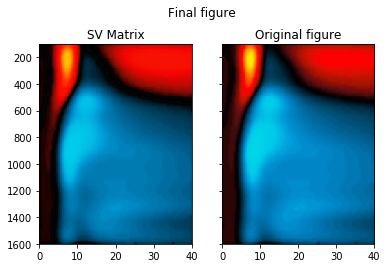

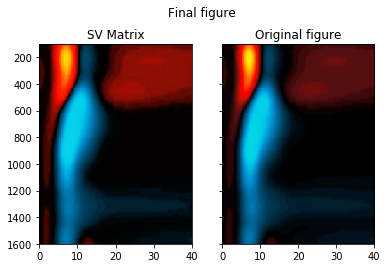

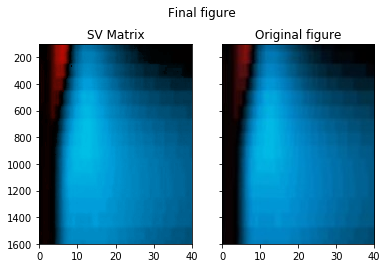

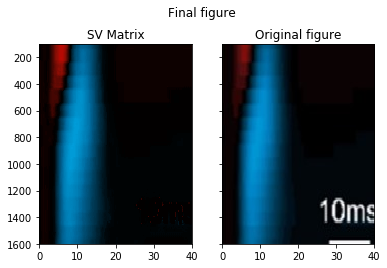

In [6]:
SVMs = []
for i in nams:
    SVMs.append(create_SVM(i))

#### REWRITE CUSTOM COLORMAP TO HEX FOR BQPLOT
These are slightly skewed for some reason, have to adjust mid when using.
hexed_cmap has black in the centre..

In [7]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

In [8]:
hexed_cmap = []
for i in range(np.shape(custom_colors)[0]):
    ehh = np.multiply(255,custom_colors[i][1]).astype(int)
    hexed_cmap.append(rgb_to_hex((ehh[0],ehh[1],ehh[2])))

#### DEFINE FUNCTION THAT UPDATES PLOTS ON CHANGE

In [9]:
# CALCULATES RESULT OF FIRING RATES ON INHIB BLOCKED PLOTS, 
# WHILE COPYING THE RELEVANT CHANGES TO THE INHIB NOT BLOCKED PLOTS
def calc_signal(change):
    for i in range(kerns.shape[0]): #kernels
        difference = change.new-change.old
        change_index = np.where(difference !=0)
        change_value = change.new[change_index]
        
        lp[i].y = np.interp(np.arange(0,num_tsteps),anchs,scp[i].y)
        lp[i].y[lp[i].y<0]=0
        scp[i].y = lp[i].y[anchs]
        if change_value == scp[i].y[change_index]:
            temp = scp2[i].y.copy()
            temp[change_index]=change_value
            lp2[i].y = np.interp(np.arange(0,num_tsteps),anchs,temp)
            lp2[i].y[lp2[i].y<0]=0
            scp2[i].y = lp2[i].y[anchs]

    gr=[]
    for j in range(kerns.shape[1]): #channels/depths
        signal_ = np.zeros(num_tsteps)            
        for i in range(kerns.shape[0]): #kernels
            signal_ += ss.convolve(100*lp[i].y,kerns[i][j],mode='same')
        gr.insert(0,signal_)
    heap.color=gr

In [10]:
# CALCULATES RESULT OF FIRING RATES ON INHIB NOT BLOCKED PLOTS, 
def calc_signal2(change):
    gr=[]
    for j in range(kerns.shape[1]): #channels/depths
        signal_ = np.zeros(num_tsteps)

        for i in range(kerns.shape[0]): #kernels
            lp2[i].y = np.interp(np.arange(0,num_tsteps),anchs,scp2[i].y)
            lp2[i].y[lp2[i].y<0]=0
            scp2[i].y = lp2[i].y[anchs]
            signal_ += ss.convolve(100*lp2[i].y,kerns[i][j],mode='same')
        gr.insert(0,signal_)
    heap2.color=gr

#### LOAD PRE-CALCULATED KERNELS

In [11]:
L5_kerns = pickle.load(open('data/L5.p', 'rb'))
L23_kerns = pickle.load(open('data/L23.p', 'rb'))
kerns = np.flip(np.asarray(np.vstack((L5_kerns,L23_kerns))),axis=1)

Define variables

In [12]:
num_kerns = 2 #number of kernels per pop included, hard set for now
num_pops = int(kerns.shape[0]/num_kerns) #number of populations included
num_kernels=kerns.shape[0]
num_tsteps = 119 #set to 119 as that was the number of timesteps og earlier method of reading data. 
# current SVMs have dissimilar x,y axes, and are no good for choosing num_tsteps
kernel_tsteps = kerns.shape[2]
t_min=0
t_max=40.
num_channels = kerns.shape[1]
num_anch=20 #minimum 3
t=np.linspace(t_min,t_max,num_tsteps)
convolution_signal_init=np.zeros((num_channels,num_tsteps))
##SIGNALS
icsd_off = SVMs[0][::-1]
icsd_on = SVMs[1][::-1]
inh_off = SVMs[2][::-1]
inh_on = SVMs[3][::-1]

#### CREATE OBJECTS FOR BQPLOT

In [89]:
#SCALES
x_scale = bq.LinearScale(min=t_min,max=t_max)
depth_scale = bq.LinearScale(min=1600,max=100)
y_scale = bq.LinearScale(min=0,max=5)
scale_scale = bq.LinearScale(min=-5,max=5)

#AXES
x_axis = bq.Axis(scale=x_scale, label='t [ms]', grid_lines='solid')
t_axis = bq.Axis(scale=x_scale, label='t [ms]', grid_lines='solid',grid_color='white')
depth_axis =bq.Axis(scale=depth_scale, label='depth [um]',orientation='vertical', grid_lines='solid',grid_color='white',tick_values=np.linspace(100,1600,16),reverse=True)
y_axis = bq.Axis(scale=y_scale, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')
scale_axis = bq.Axis(scale=scale_scale,orientation='vertical',color='black',label_color='red',grid_color='white')

#LAYOUT
# fig_layout_old = widgets.Layout(width='100%',height='400px')
# fig_layout = widgets.Layout(width='250px',height='400px')
# scale_layout = widgets.Layout(width='200px',height='400px')
# signal_layout = widgets.Layout(width='400px',height='400px')
fig_layout = widgets.Layout(width='25%',height='400px')
fig_margin = {'top':60, 'bottom':60, 'left':60, 'right':10} #figure margins
scale_layout = widgets.Layout(width='20%',height='400px')
signal_layout = widgets.Layout(width='40%',height='400px')

#COLORMAPS
"""These are a bit skewed, why?
mid value found from plotting 'diverging'"""
col_sc_full = bq.ColorScale(colors=hexed_cmap,mid=.6,max=5,min=-5) 
col_sc = bq.ColorScale(colors=hexed_cmap,mid=0.6/5,max=1,min=-1) #rescaled so smaller anchor-drags make larger changes

# LABELS
labels = ['L5a_e','L5b_e','L23a_e','L23b_e']
label_colors=['red','blue','green','purple']
label_heights=[0.2,0.4,0.6,0.8]

#### CREATE AND DISTRIBUTE ANCHORS EVENLY

In [90]:
count = int(np.floor((num_tsteps-1)/(num_anch-1)))
remainder = (num_tsteps-1)%(num_anch-1)
anchs=[0]
for i in range(num_anch-1):
    if i < remainder:
        anchs=np.hstack((anchs,(i+1)*(count+1)))
    else:
        anchs=np.hstack((anchs,(remainder)*(count+1)+count*(i+1-remainder)))

#INITIALIZE ANCHORS
anchor_y = np.zeros(num_anch) #setting all to 0 wrecks it, why?!?!? Same for creators toturial examples, so just make a warning.
anchor_y[-1]=0.0001

#INTERPOLATE VALUES BETWEEN ANCHORS
y_data = np.interp(np.arange(0,num_tsteps),anchs,anchor_y)
#X AND Y POSITIONS OF ANCHORS
x_a = anchs*t_max/(num_tsteps-1)
y_a = anchor_y

#### FINALLY CREATE PLOT

In [93]:
from ipywidgets import Layout

# STUFF TO BE PLOTTED
heap = bq.HeatMap(color=convolution_signal_init,
                  scales={'color':col_sc},
                 )
heap2 = bq.HeatMap(color=convolution_signal_init,
                  scales={'color':col_sc},
                 )
signal_icsd_on = bq.HeatMap(color=icsd_on,x = np.linspace(0,40,icsd_on.shape[1]),
                            scales={'color':col_sc_full}
                           )
signal_inh_on = bq.HeatMap(color=inh_on,x = np.linspace(0,40,inh_on.shape[1]),
                           scales={'color':col_sc_full}
                          )
signal_icsd_off = bq.HeatMap(color=icsd_off, 
                             x = np.linspace(0,40,icsd_off.shape[1]),
                             y = np.linspace(0,40,icsd_off.shape[0]),
                             layout=Layout(width='20px',height='200px'),
                             scales={'color':col_sc_full}
                            )
signal_inh_off= bq.HeatMap(color=inh_off,x = np.linspace(0,40,inh_off.shape[1]),
                           scales={'color':col_sc_full},
                          )

scales_plot = bq.HeatMap(color=np.asarray(diverging_matrix).T, scales={'color':col_sc_full})

# diverging IS USED FOR CENTERING BQPLOT CMAP
# diverging = bq.HeatMap(color=np.array(diverging_matrix),scales={'color':col_sc_full})

# For storing inhib blocked plots
scp=[] #scatterplot
lp=[] #lineplot
sl=[] #sliderlabels
kl=[] #kernellabels

# For storing inhib NOT blocked plots
scp2=[] #scatterplot
lp2=[] #lineplot
sl2=[] #sliderlabels
kl2=[] #kernellabels

figy=[]
for i in range(4):
    scatter_plot = bq.Scatter(x=x_a, y=y_a,scales={'x': x_scale, 'y': y_scale},colors=[label_colors[i]],enable_move=True,restrict_y=True)
    scp.append(scatter_plot)
    line_plot = bq.Lines(x=t,y=y_data,scales={'x': x_scale, 'y': y_scale},colors=[label_colors[i]],enable_move=True,restrict_y=True)
    lp.append(line_plot)
    slider_label = bq.Label(x=[0.1], y=[0.8], text=[labels[i]], default_size=26,
                   font_weight='bolder', colors=[label_colors[i]])
    sl.append(slider_label)
    kernel_label = bq.Label(x=[0.1], y=[label_heights[i]], text=[labels[i]], default_size=26,
                  font_weight='bolder', colors=[label_colors[i]])
    kl.append(kernel_label)
    scp[i].observe(calc_signal,['y'])
    
figx=[]
for i in range(4):
    figx.append(bq.Figure(
        fig_margin=fig_margin,
        layout=fig_layout,
        axes=[x_axis,y_axis],
        marks=[sl[i],lp[i],scp[i]]))

figy.append(widgets.HBox(figx))
figy.append(widgets.HBox([
                    bq.Figure(
                        layout=signal_layout,
                        title='convolution',
                        marks=[heap],
                        axes=[t_axis,depth_axis]

                    ),

                    bq.Figure(
                        layout=scale_layout,
                        title='scale',
                        marks=[scales_plot], 
                        axes=[scale_axis]    
                    ),

                    bq.Figure(
                        layout=signal_layout,
                        title='inh_off',
#                         marks=[signal_inh_off],
                        marks=[signal_icsd_off],
                        axes=[t_axis,depth_axis]
                    ),
                ]))

for i in range(4):
    scatter_plot = bq.Scatter(x=x_a, y=y_a,scales={'x': x_scale, 'y': y_scale},colors=[label_colors[i]],enable_move=True,restrict_y=True)
    scp2.append(scatter_plot)
    line_plot = bq.Lines(x=t,y=y_data,scales={'x': x_scale, 'y': y_scale},colors=[label_colors[i]],enable_move=True,restrict_y=True)
    lp2.append(line_plot)
    slider_label = bq.Label(x=[0.1], y=[0.8], text=[labels[i]], default_size=26,
                   font_weight='bolder', colors=[label_colors[i]])
    sl2.append(slider_label)
    kernel_label = bq.Label(x=[0.1], y=[label_heights[i]], text=[labels[i]], default_size=26,
                  font_weight='bolder', colors=[label_colors[i]])
    kl2.append(kernel_label)
    scp2[i].observe(calc_signal2,['y'])
    
    
#  
figx=[]
for i in range(4):
    figx.append(bq.Figure(fig_margin=fig_margin,layout=fig_layout,axes=[x_axis,y_axis],marks=[sl2[i],lp2[i],scp2[i]]))
figy.append(widgets.HBox(figx))
figy.append(widgets.HBox([
                    bq.Figure(
                        layout=signal_layout,
                        title='convolution',
                        marks=[heap2],
                        axes=[t_axis,depth_axis]

                    ),

                    bq.Figure(
                        layout=scale_layout,
                        title='scale',
                        marks=[scales_plot], 
                        axes=[scale_axis]    
                    ),

                    bq.Figure(
                        layout=signal_layout,
                        title='inh_on',
#                         marks=[signal_inh_on],
                        marks=[signal_icsd_on],
                        axes=[t_axis,depth_axis]

                    )
                ]))
display(widgets.VBox(figy))